# kmeans

In [1]:
import numpy as np
x = [1,2,5,8,7,4,5]
y = [2,4,8,9,10,2,3]

In [2]:
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

# chosing random point as centers

In [3]:
def get_rand_n_cluster(n_clusters,size):
    centers_ = []
    centers_.append(rd.randint(0,size-1))
    while len(centers_)< n_clusters:
        rand_index = rd.randint(0,size-1)
        if rand_index not in centers_:
            centers_.append(rand_index)
    return centers_

# calculating squared Euclidean distance

# distnace between A(x1,y1) and B(x2,y2) is (x2-x1)^2 + (y2-y1)^2 

In [4]:
def calc_dist(x,y,x1,y1):
    x_diff = np.array(x)-x1
    y_diff = np.array(y)- y1
    x_diff = x_diff**2
    y_diff = y_diff**2
    return x_diff+y_diff

In [5]:
def clc_dist_to_centers(centers,x,y,centers_points=None):
    res_ = []
    if centers is not None:
        for i in range(len(centers)):
            res = calc_dist(x, y , x[centers[i]],y[centers[i]])
            res_.append(res)
    else:
        for xx,yy in centers_points:
            res = calc_dist(x, y , xx,yy)
            res_.append(res) 
    return res_

# evaluating the class of the point

In [6]:
def eval_class(x_or_y,res_):
    class_ = []
    for i in range(0,len(x)):
        min_dist = min([elem[i] for elem in res_])
        for indx , element in enumerate(res_):
            if element[i] == min_dist:
                class_.append(indx)
                break
    return class_

# claculating the new centers

In [7]:
def get_center_points(x,y,k,class_):
    res = np.vstack([np.array(x),np.array(y),np.array(class_)])
    res = res.T
    df =  pd.DataFrame(data=res , columns  = ["x","y","class"])
    center_points = []
    for clas in range(k):
        x_ = df[df["class"] == clas]["x"]
        x_center = x_.sum()/len(x_)
        y_ = df[df["class"] == clas]["y"]
        y_center = y_.sum()/len(y_)
        center_points.append( (x_center,y_center) )
    return center_points

# determining the best partion

In [8]:
def best_class(classes ,x,y,k):
    """find the partition that minimizes the square dictance between the point of each cluster and the center"""
    sum_dist_for_class = []
    for classe in classes:
        res = np.vstack([x,y,classe]) 
        res = res.T
        df = pd.DataFrame(data = res , columns = ["x","y","c"])
        sum_dist = 0
        for i in range(k):
            sub_div = df[df.c == i]
            gx = sub_div.x.sum()/k
            gy = sub_div.y.sum()/k
            dist = calc_dist(sub_div.x,sub_div.y,gx,gy)
            sum_dist += dist.sum()
        sum_dist_for_class.append(sum_dist)
    min_dist = min(sum_dist_for_class)
    return classes[sum_dist_for_class.index(min_dist)]

In [9]:
def is_end(class_  ,new_class):
    if len(class_) != len(new_class):
        print("not the same size")
        return False
    for i in range(len(class_)):
        if class_[i] != new_class[i]:
            return False
    return True

In [10]:
def KMeans(x,y,k,n_itterations):
    classes = []
    for i in range(n_itterations):
        centers = get_rand_n_cluster(k,len(x))
        res = clc_dist_to_centers(centers,x,y)
        class_ = eval_class(x,res)
        new_class = None
        while True:
            new_centers = get_center_points(x,y,k,class_)
            res_ = clc_dist_to_centers(None,x,y,new_centers)
            new_class = eval_class(x,res_)
            if is_end(class_ , new_class):
                break
            class_ = new_class
        plt.scatter(x,y,c=class_)
        plt.show()
        classes.append(class_)
    final_class = best_class(classes,x,y,k)
    print(f"the best")
    plt.scatter(x,y,c=final_class)
    plt.show()

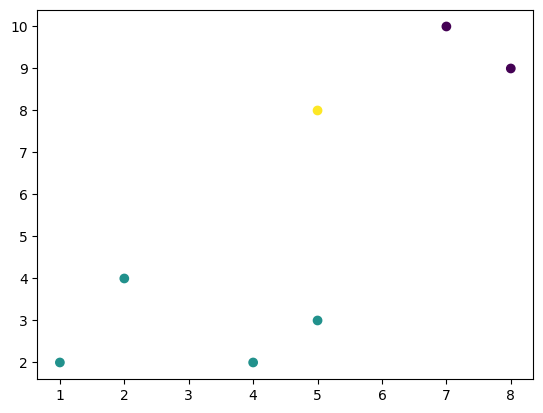

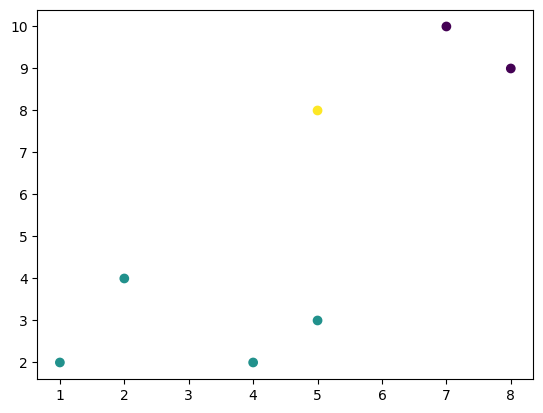

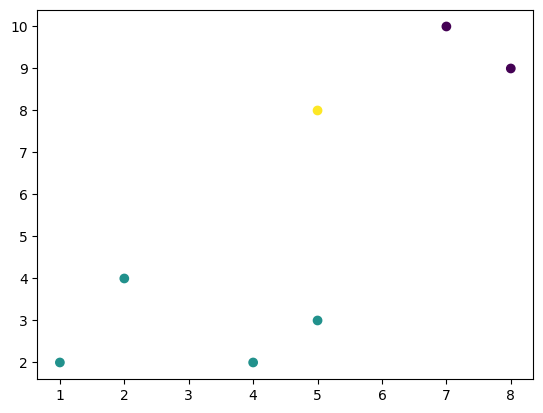

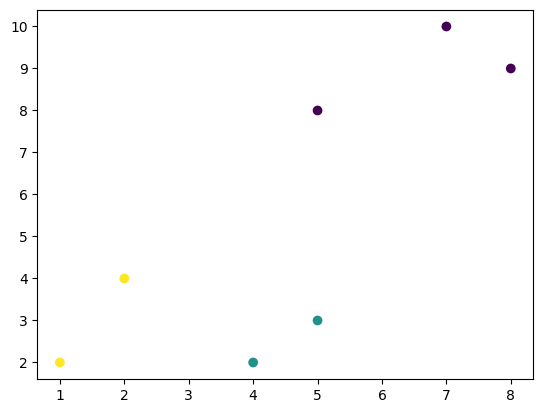

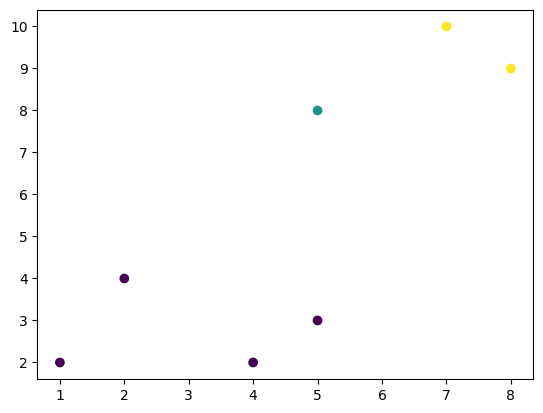

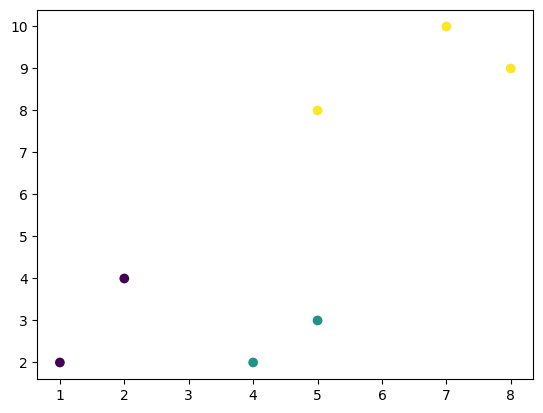

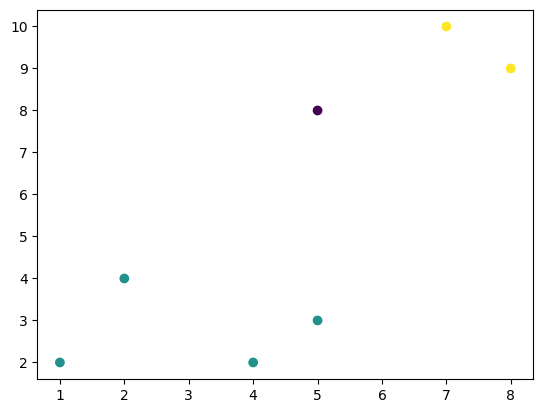

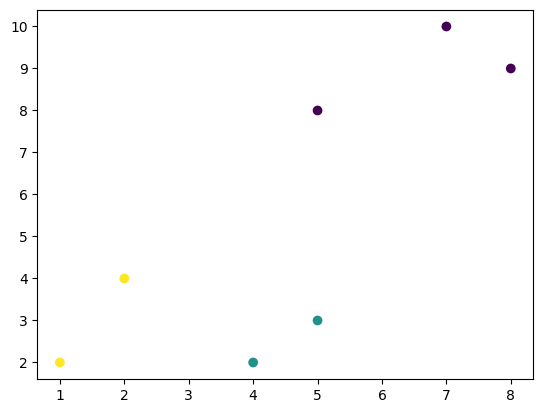

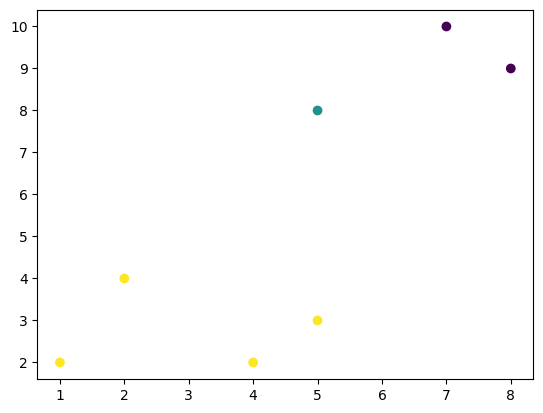

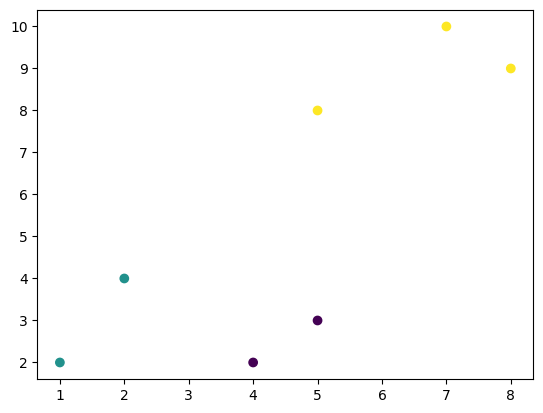

the best


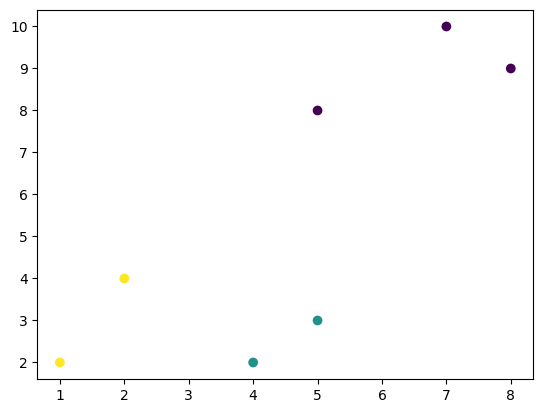

In [11]:
KMeans(x,y,3,10)